# Employee dataset
This dataset contains information about employees in a company, including their educational backgrounds, work history, demographics, and employment-related factors. It has been anonymized to protect privacy while still providing valuable insights into the workforce.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')

In [3]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


## cleaning

In [5]:
df.value_counts().sum()

4653

In [6]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
print(df[df.duplicated()])

      Education  JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
111   Bachelors         2017       Pune            2   27  Female          No   
130   Bachelors         2017  Bangalore            3   26  Female          No   
138   Bachelors         2017  New Delhi            3   28    Male          No   
160   Bachelors         2014  Bangalore            3   28  Female          No   
167   Bachelors         2014  Bangalore            3   25    Male          No   
...         ...          ...        ...          ...  ...     ...         ...   
4640  Bachelors         2015  Bangalore            3   35    Male          No   
4642  Bachelors         2012  Bangalore            3   36  Female          No   
4646  Bachelors         2013  Bangalore            3   25  Female          No   
4648  Bachelors         2013  Bangalore            3   26  Female          No   
4652  Bachelors         2015  Bangalore            3   33    Male         Yes   

      ExperienceInCurrentDo

In [8]:
df.duplicated().sum()

1889

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.value_counts().sum()

2764

## Analyze

In [11]:
ds=df.describe().transpose()

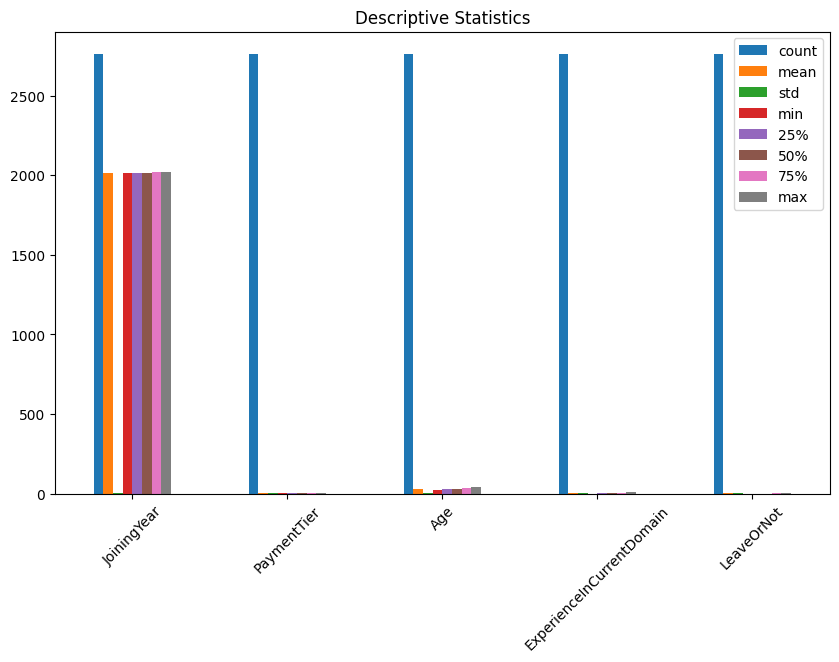

In [12]:
ds.plot(kind='bar', figsize=(10, 6))
plt.title('Descriptive Statistics')
plt.xticks(rotation=45)
plt.show()

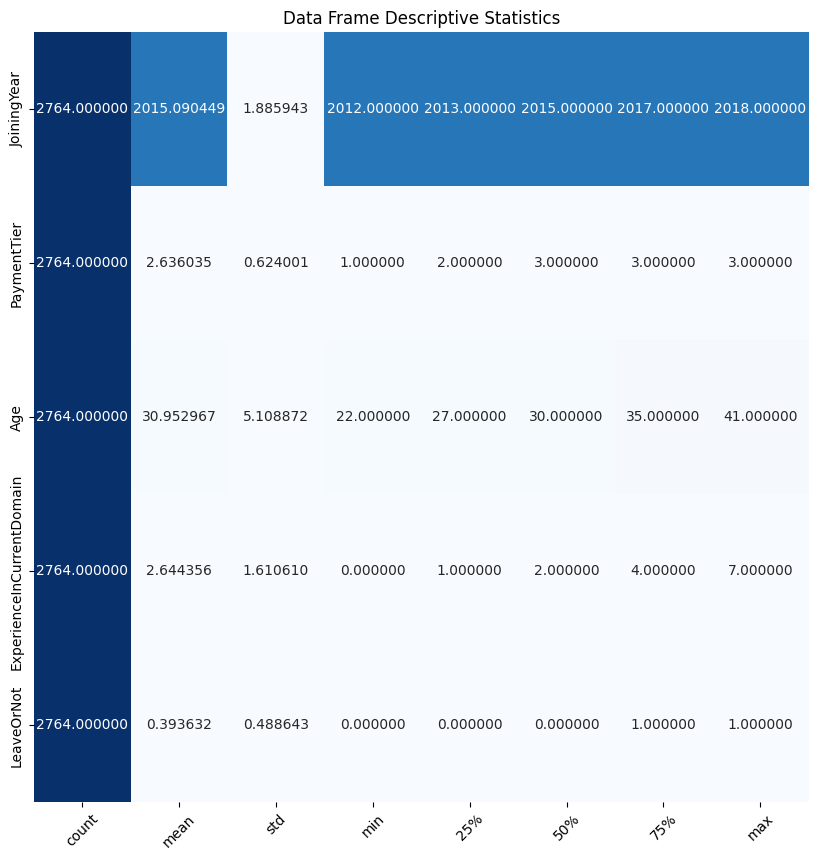

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(ds, annot=True, cmap='Blues',cbar=False, fmt='f')
plt.xticks(rotation=45)
plt.title('Data Frame Descriptive Statistics')
plt.show()

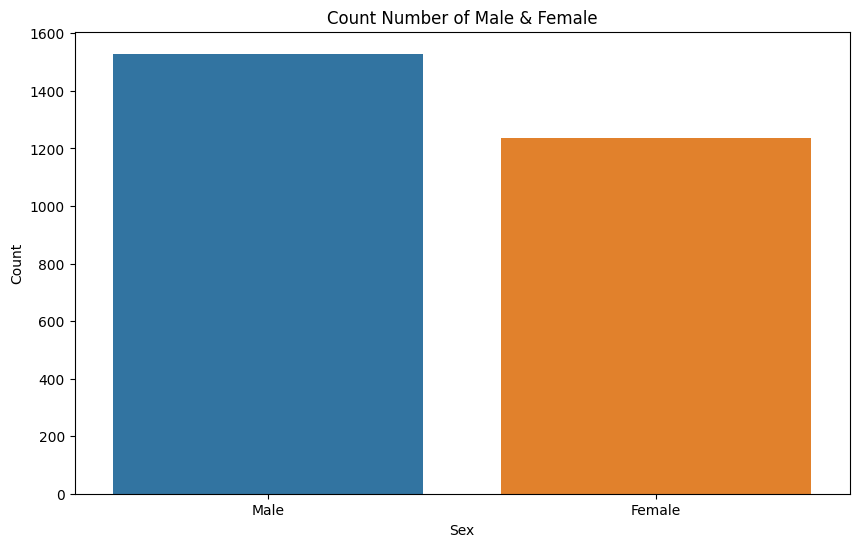

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df,x='Gender')
plt.title('Count Number of Male & Female')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

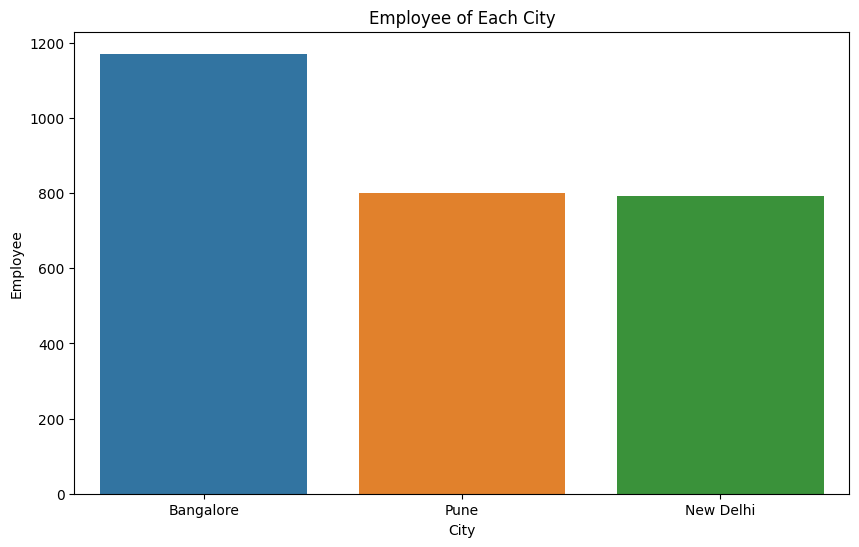

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='City')
plt.title('Employee of Each City')
plt.xlabel('City')
plt.ylabel('Employee')
plt.show()

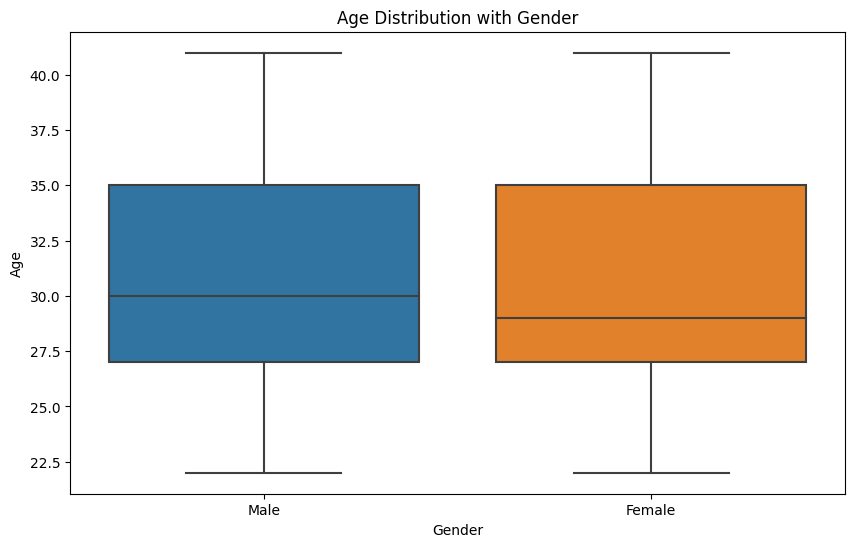

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Age')
plt.title('Age Distribution with Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

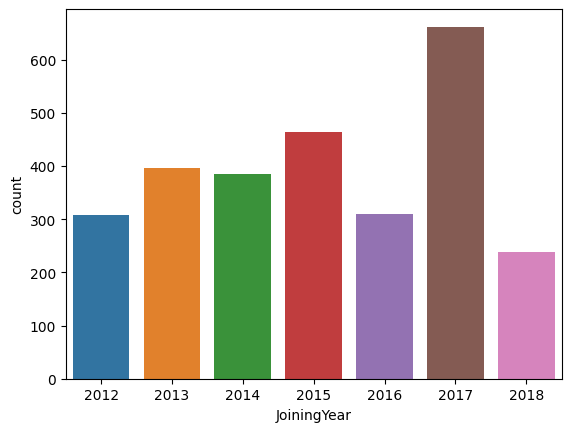

In [17]:
sns.countplot(data=df,x='JoiningYear')
plt.show()

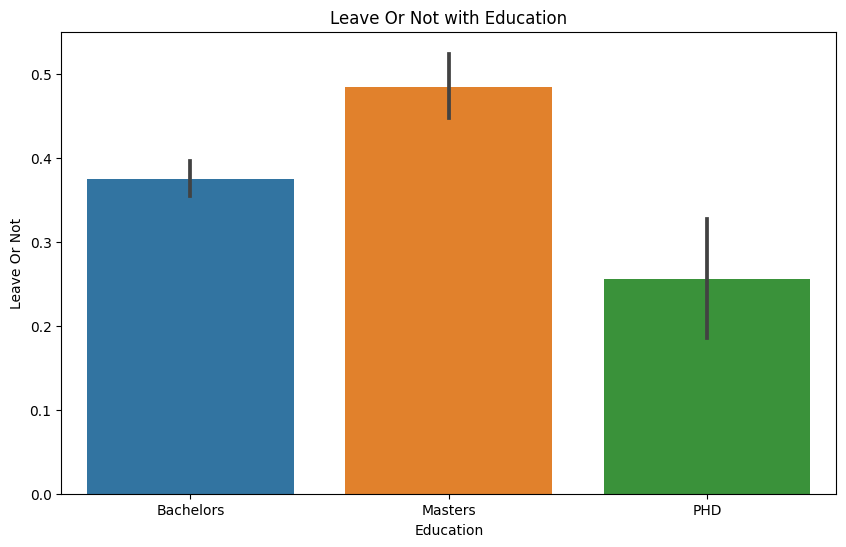

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='LeaveOrNot')
plt.title('Leave Or Not with Education')
plt.xlabel('Education')
plt.ylabel('Leave Or Not')
plt.show()

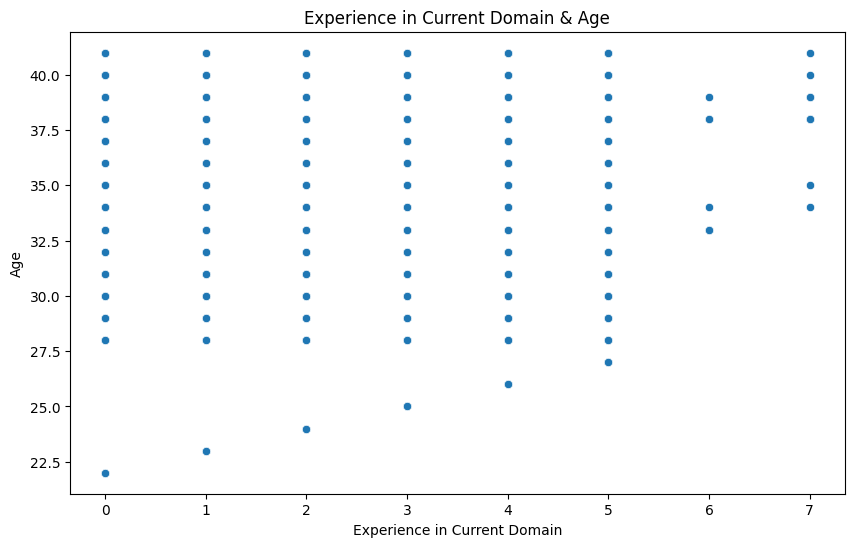

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ExperienceInCurrentDomain', y='Age')
plt.title('Experience in Current Domain & Age')
plt.xlabel('Experience in Current Domain')
plt.ylabel('Age')
plt.show()

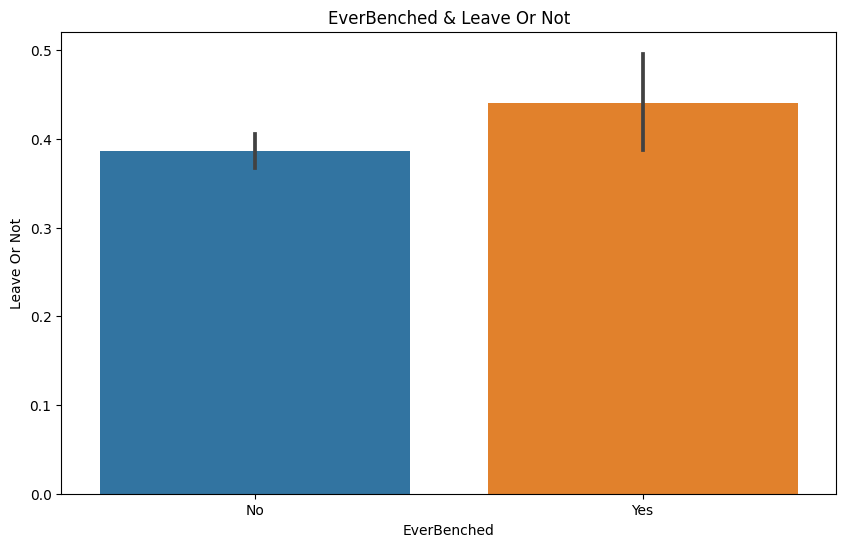

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='EverBenched', y='LeaveOrNot')
plt.title('EverBenched & Leave Or Not')
plt.xlabel('EverBenched')
plt.ylabel('Leave Or Not')
plt.show()

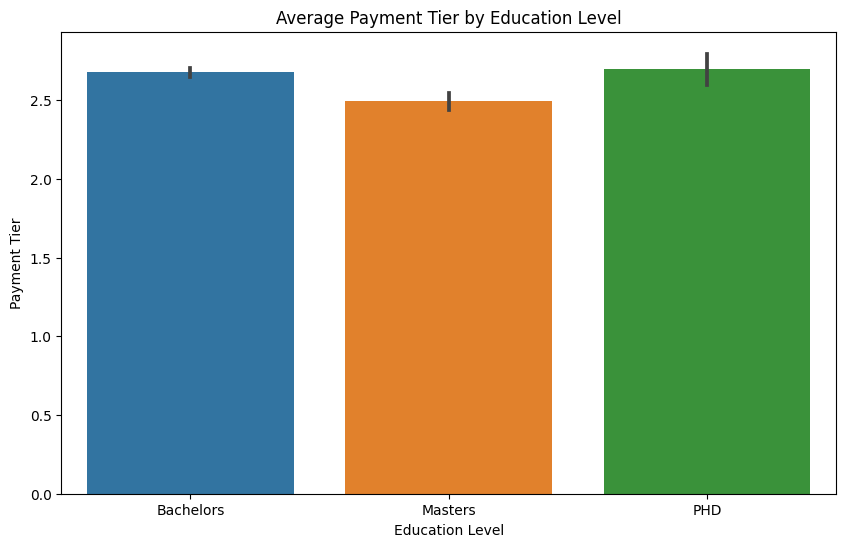

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Education', y='PaymentTier')
plt.title('Average Payment Tier by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Payment Tier')
plt.show()

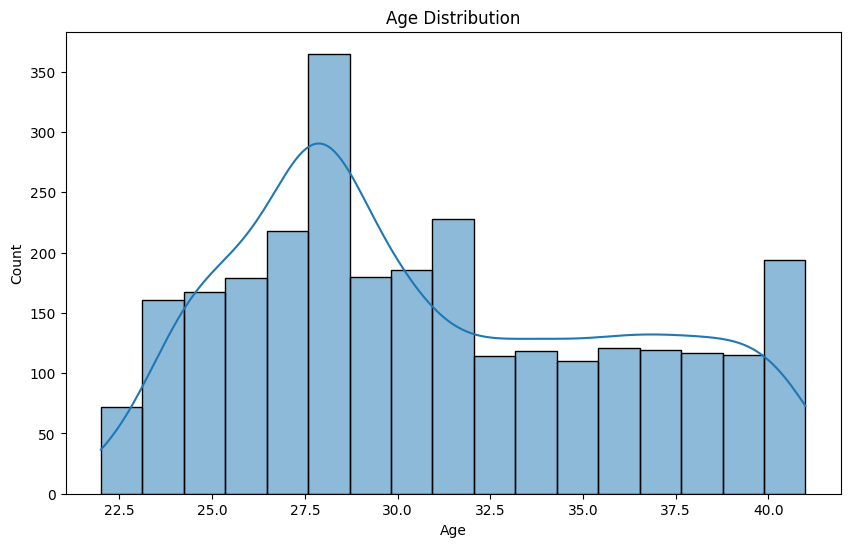

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

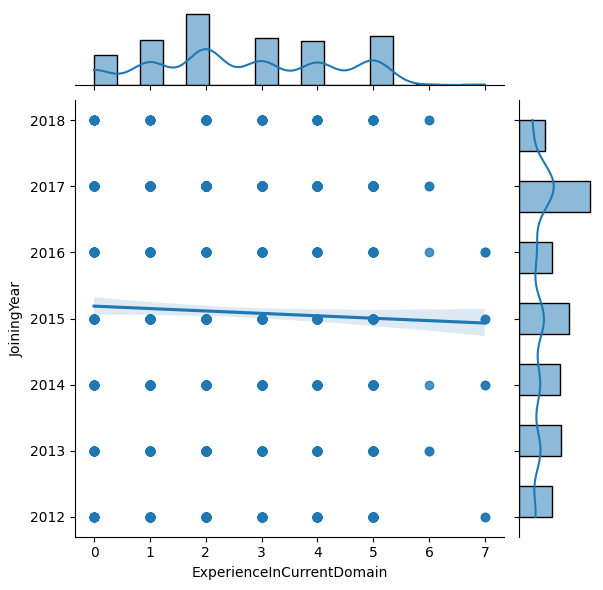

In [23]:
sns.jointplot(data=df, x='ExperienceInCurrentDomain',y='JoiningYear',kind='reg')
plt.show()

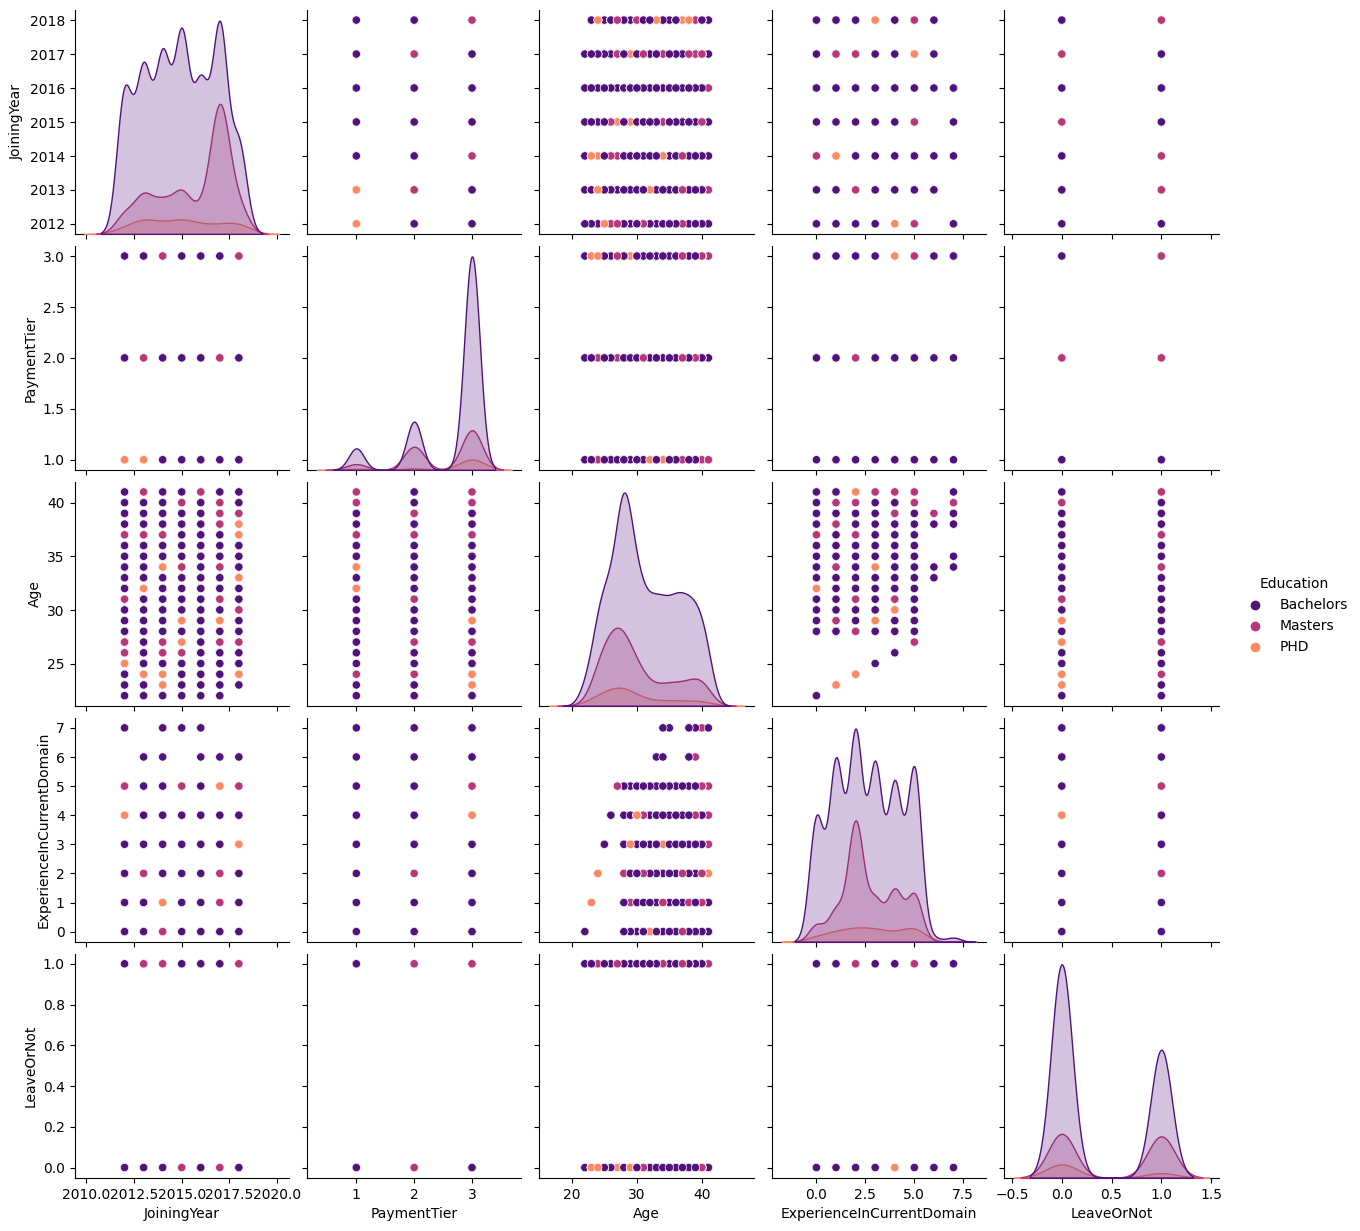

In [24]:
sns.pairplot(df,hue='Education',palette='magma')
plt.show()

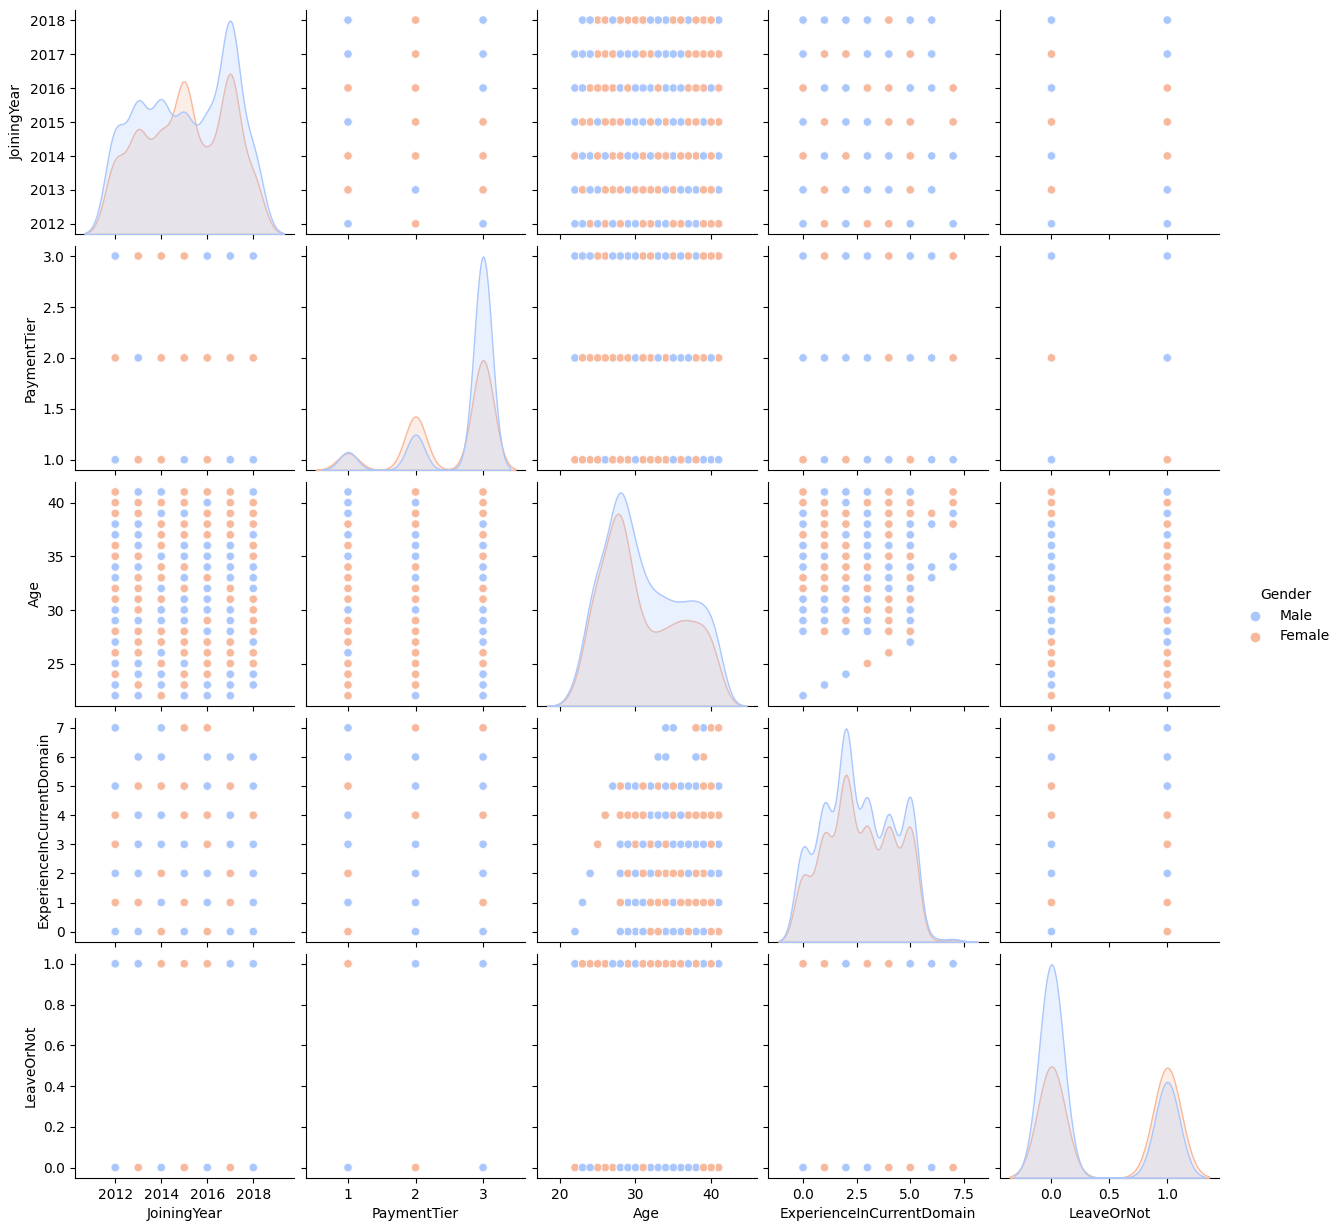

In [25]:
sns.pairplot(df,hue='Gender',palette='coolwarm')
plt.show()

## Bulid Model

In [26]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [27]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
scale=StandardScaler()

from sklearn import preprocessing
object_data=df.select_dtypes(include=['object'])
le=preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:,i]=le.fit_transform(object_data.iloc[:,i])
num_data=df.select_dtypes(exclude=['object'])
df=pd.concat([object_data,num_data],axis=1)  

In [28]:
features=['Education','EverBenched','JoiningYear','City','PaymentTier']
x=df[features].copy()

In [29]:
y=df['LeaveOrNot']

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=13)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.1,random_state=13)

In [31]:
x_train=scale.fit_transform(x_train)
x_val=scale.transform(x_val)
x_test=scale.transform(x_test)

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
LogisticRegression(solver='saga')


In [33]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression(penalty='l2',C=1.0,solver='saga')
log_model.fit(x_train,y_train)

LogisticRegression(solver='saga')

In [34]:
from sklearn.metrics import accuracy_score , classification_report ,confusion_matrix

In [35]:
y_pred_train=log_model.predict(x_train)
y_pred_val=log_model.predict(x_val)

In [36]:
print('accuracy of x_train = ',accuracy_score(y_train,y_pred_train))
print('accuracy of x_val = ',accuracy_score(y_val,y_pred_val))

accuracy of x_train =  0.6151990349819059
accuracy of x_val =  0.6389891696750902


In [37]:
y_pred_test=log_model.predict(x_test)

In [38]:
print('accuracy of x_test = ',accuracy_score(y_test,y_pred_test))

accuracy of x_test =  0.6419529837251357


In [39]:
cm=confusion_matrix(y_test,y_pred_test)

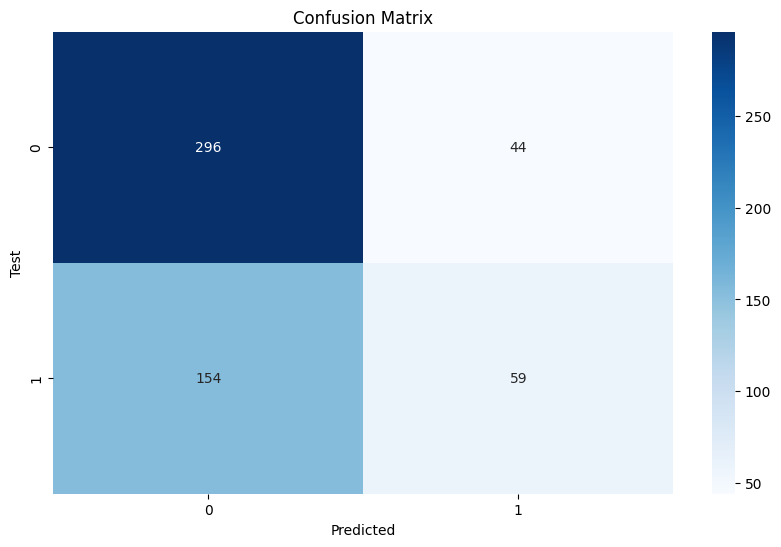

In [40]:
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()

In [41]:
from sklearn import svm
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}
svm_model = svm.SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.771627354488376


In [42]:
sv_model=svm.SVC(C= 10, gamma= 0.1, kernel= 'rbf')
sv_model.fit(x_train,y_train)

SVC(C=10, gamma=0.1)

In [43]:
y_pred_train1=sv_model.predict(x_train)
y_pred_val1=sv_model.predict(x_val)

In [44]:
print('accuracy of x_train = ',accuracy_score(y_train,y_pred_train1))
print('accuracy of x_val = ',accuracy_score(y_val,y_pred_val1))

accuracy of x_train =  0.7820667470848411
accuracy of x_val =  0.7978339350180506


In [45]:
y_pred_test1=sv_model.predict(x_test)

In [46]:
print('accuracy of x_test = ',accuracy_score(y_test,y_pred_test1))

accuracy of x_test =  0.7902350813743219


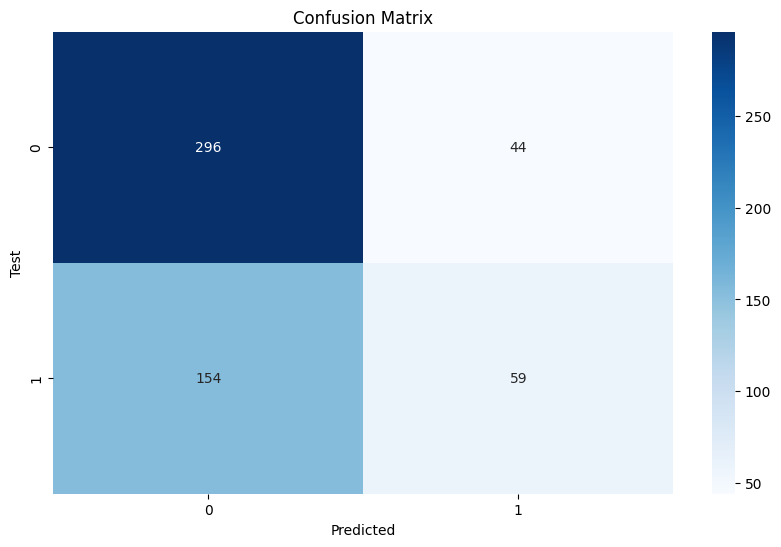

In [47]:
cm1=confusion_matrix(y_test,y_pred_test1)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Test')
plt.show()